<a href="https://colab.research.google.com/github/banala-surekha/CODSOFT/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Load the dataset
data = pd.read_csv("/content/titanic.csv")

# Display dataset overview
print("Dataset shape:", data.shape)
print(data.head())
print(data.info())


Dataset shape: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8

In [ ]:
# Handle missing values
# Handle missing values
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Convert categorical features to numerical using one-hot encoding
features = pd.get_dummies(data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived']),
                         columns=['Sex', 'Embarked', 'Pclass'],  # List categorical columns to encode
                         drop_first=True)  # To avoid multicollinearity

target = data['Survived']

# Display the first few rows of the processed features and target
print(features.head())
print(target.head())


    Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S  Pclass_2  \
0  22.0      1      0   7.2500      True       False        True     False   
1  38.0      1      0  71.2833     False       False       False     False   
2  26.0      0      0   7.9250     False       False        True     False   
3  35.0      1      0  53.1000     False       False        True     False   
4  35.0      0      0   8.0500      True       False        True     False   

   Pclass_3  
0      True  
1     False  
2      True  
3     False  
4      True  
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


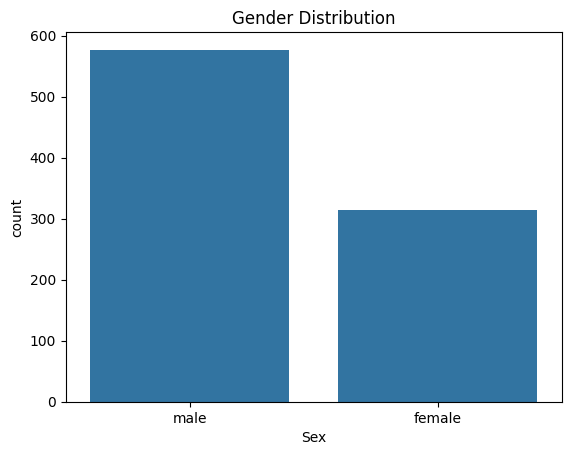

In [ ]:
# Visualize the distribution of gender
sns.countplot(x='Sex', data=data)
plt.title('Gender Distribution')
plt.show()


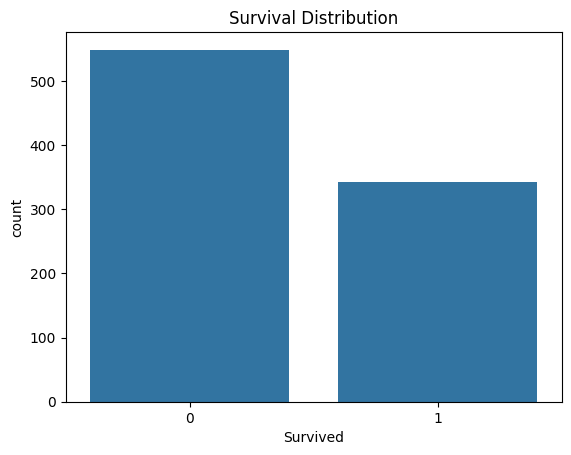

In [ ]:
# Visualize the distribution of survival
sns.countplot(x='Survived', data=data)
plt.title('Survival Distribution')
plt.show()


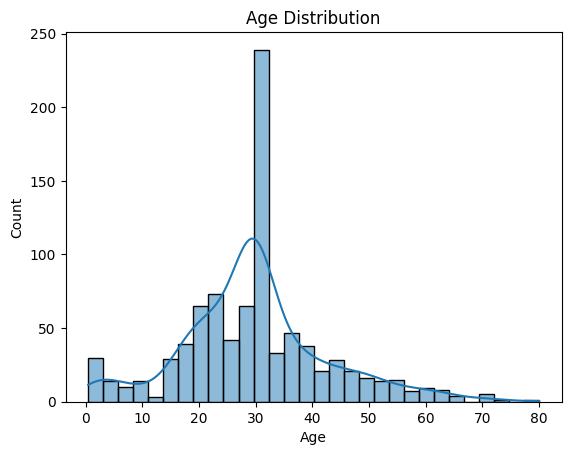

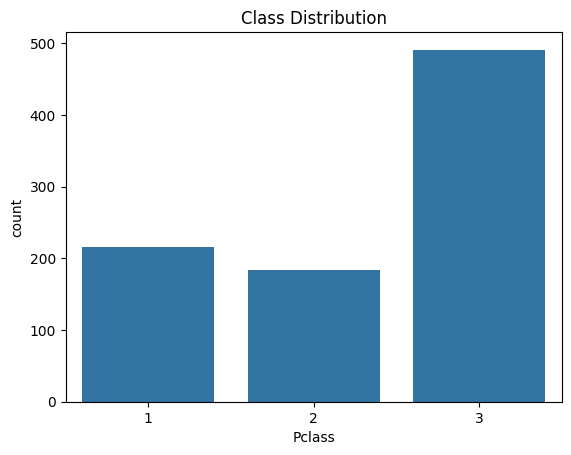

In [ ]:
# Visualize the distribution of age
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()
# Visualize the distribution of passenger class
sns.countplot(x='Pclass', data=data)
plt.title('Class Distribution')
plt.show()


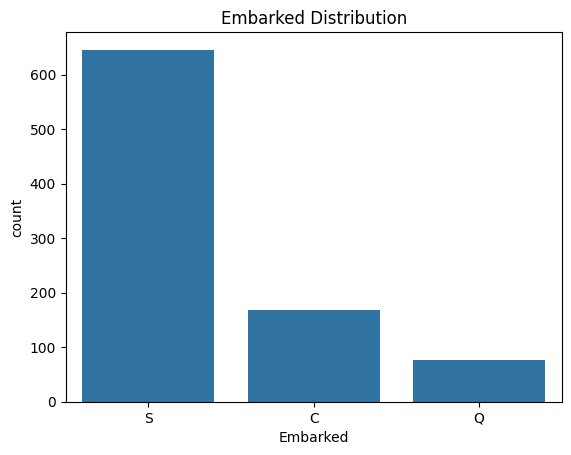

In [ ]:
# Visualize the distribution of embarked locations
sns.countplot(x='Embarked', data=data)
plt.title('Embarked Distribution')
plt.show()



In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Evaluate the model on the training data
train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training accuracy:", train_accuracy)

Training accuracy: 0.8103932584269663


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Evaluate the model on the testing data
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Testing accuracy:", test_accuracy)


Testing accuracy: 0.8044692737430168
